1. Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

2. Import Dataframe

In [2]:
# Import Dataframe
path = r'/Users/seema/Documents/CareerFoundry/A6/Data Project'
df_happiness = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'happiness_cleaned.csv'), index_col = False)

3. Prepare Data

In [3]:
df_happiness.head()

,Unnamed: 0,Rank,Country,Score,GDP Per Capita,Social Support,Life Expectancy,Freedom,Generosity,Perception of Corruption
0,0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [4]:
# Dropping Unnecessary Columns
happiness_subset = df_happiness.drop(['Unnamed: 0', 'Country'], axis = 1)

In [5]:
happiness_subset.head()

,Rank,Score,GDP Per Capita,Social Support,Life Expectancy,Freedom,Generosity,Perception of Corruption
0,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [6]:
# Change Variables Types
happiness_subset['Rank'] = happiness_subset['Rank'].astype('int64')

4. Create Correlation Matrix Heatmap

In [7]:
# Create Correlation Matrix
happiness_subset.corr()

,Rank,Score,GDP Per Capita,Social Support,Life Expectancy,Freedom,Generosity,Perception of Corruption
Rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959
Score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP Per Capita,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social Support,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Life Expectancy,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perception of Corruption,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


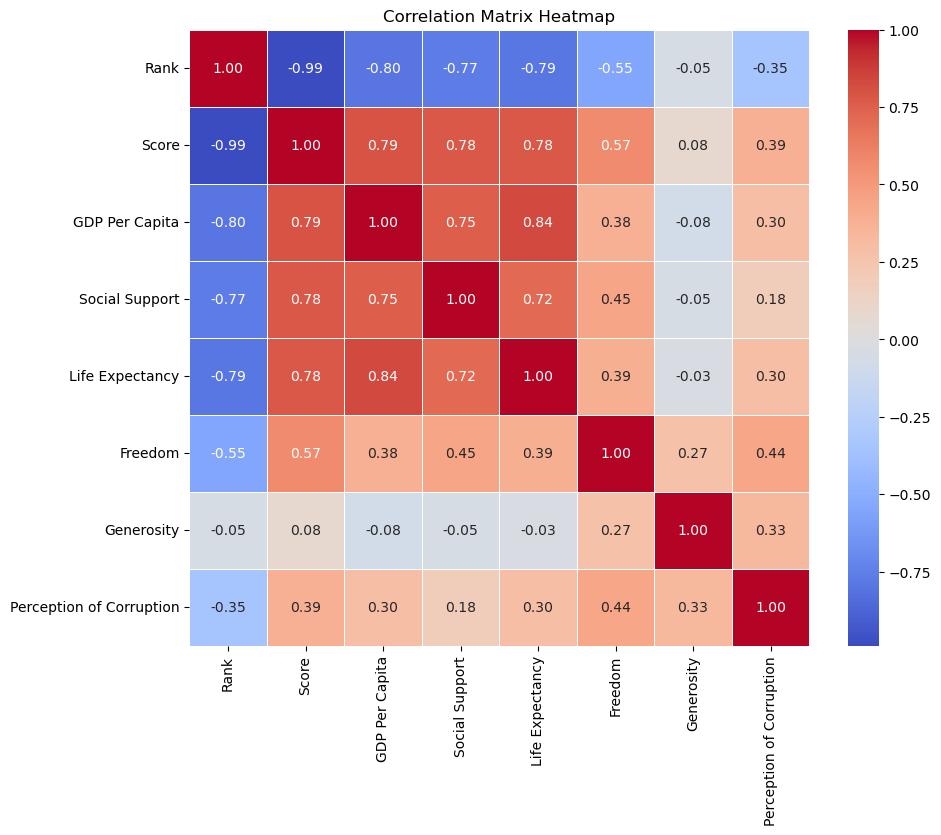

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(happiness_subset.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

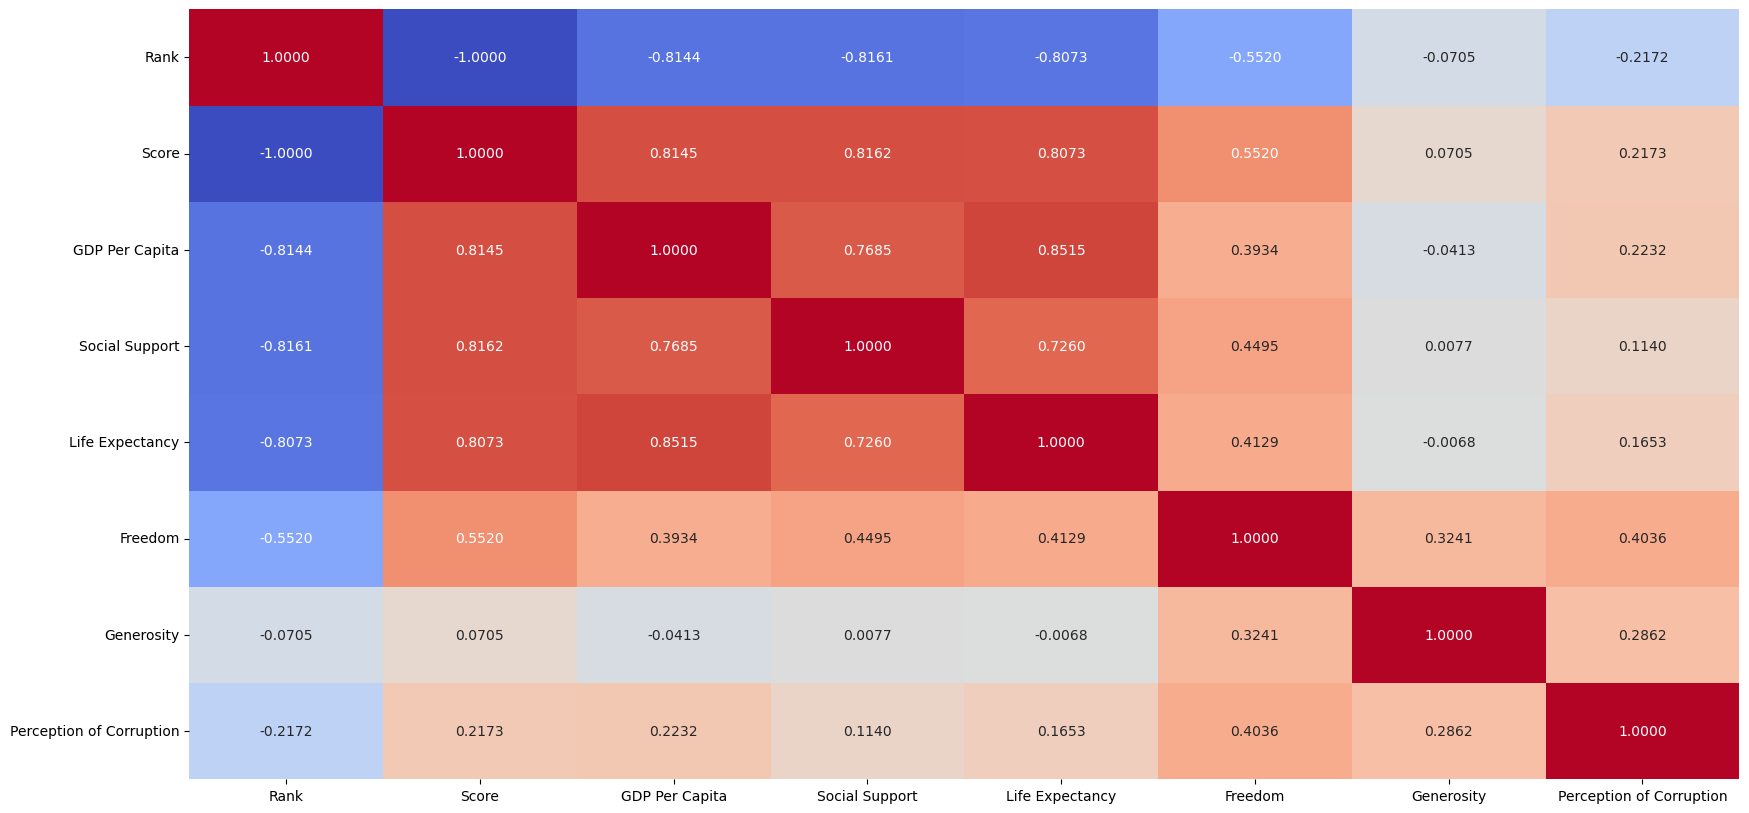

In [13]:

fig, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(happiness_subset.corr(method='spearman'), annot=True, fmt='.4f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
plt.savefig('corrheatmap.png', bbox_inches='tight', pad_inches=0.0)

Q3 Discussion: Happiness rank and score have an inverse relationship with each other, which makes sense given that as the score increases, there is higher happiness and thus a lower rank. The coefficients closer to 1 show the stronger relationships so the GDP per capita is most correlated with the happiness score, so it is most correlated with greater happiness. After GDP per capita, social support and life expectancy also seem very correlated with perceived happiness.

5. Create Scatterplots

/Users/seema/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


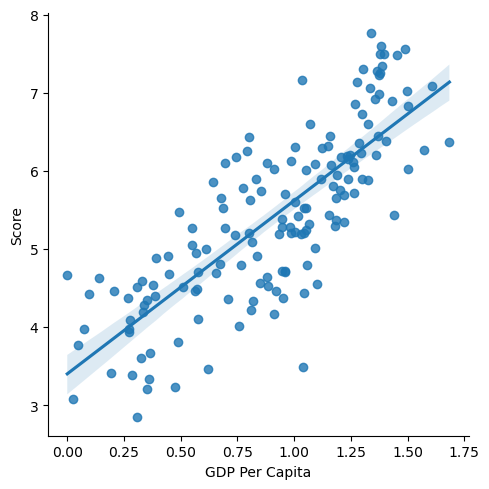

In [26]:
# Create Scatterplot Score v. GDP
sns.lmplot(x = 'GDP Per Capita', y = 'Score', data = happiness_subset)

/Users/seema/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


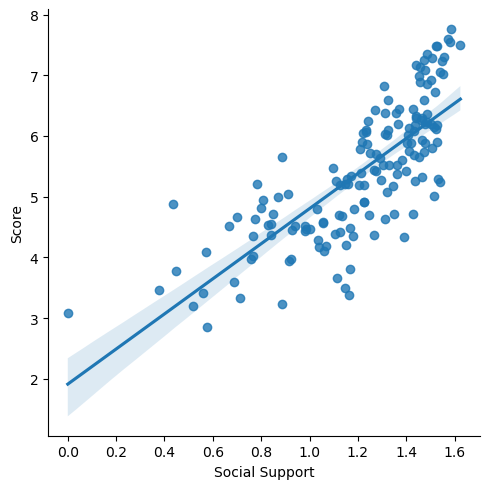

In [27]:
# Create Scatterplot Score v. Social Support
sns.lmplot(x = 'Social Support', y = 'Score', data = happiness_subset)

/Users/seema/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


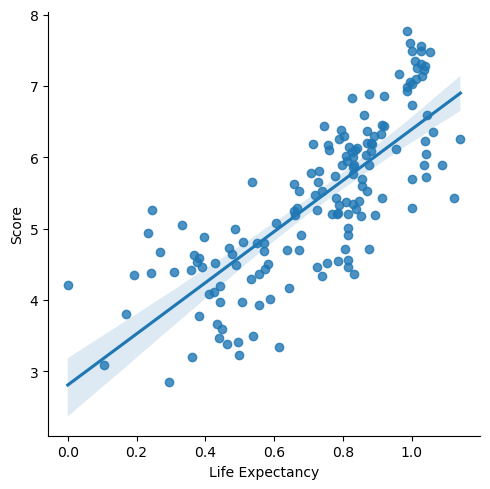

In [28]:
# Create Scatterplot Score v. Life Expectancy
sns.lmplot(x = 'Life Expectancy', y = 'Score', data = happiness_subset)

Q4 Discussion: I created scatterplots of the score against GDP per capita, social support, and life expectancy. These plots illustrate the positive relationship between these variables.

6. Create Pair Plot

/Users/seema/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/seema/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/seema/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/seema/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

/Users/seema/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/seema/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/seema/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/seema/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

/Users/seema/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


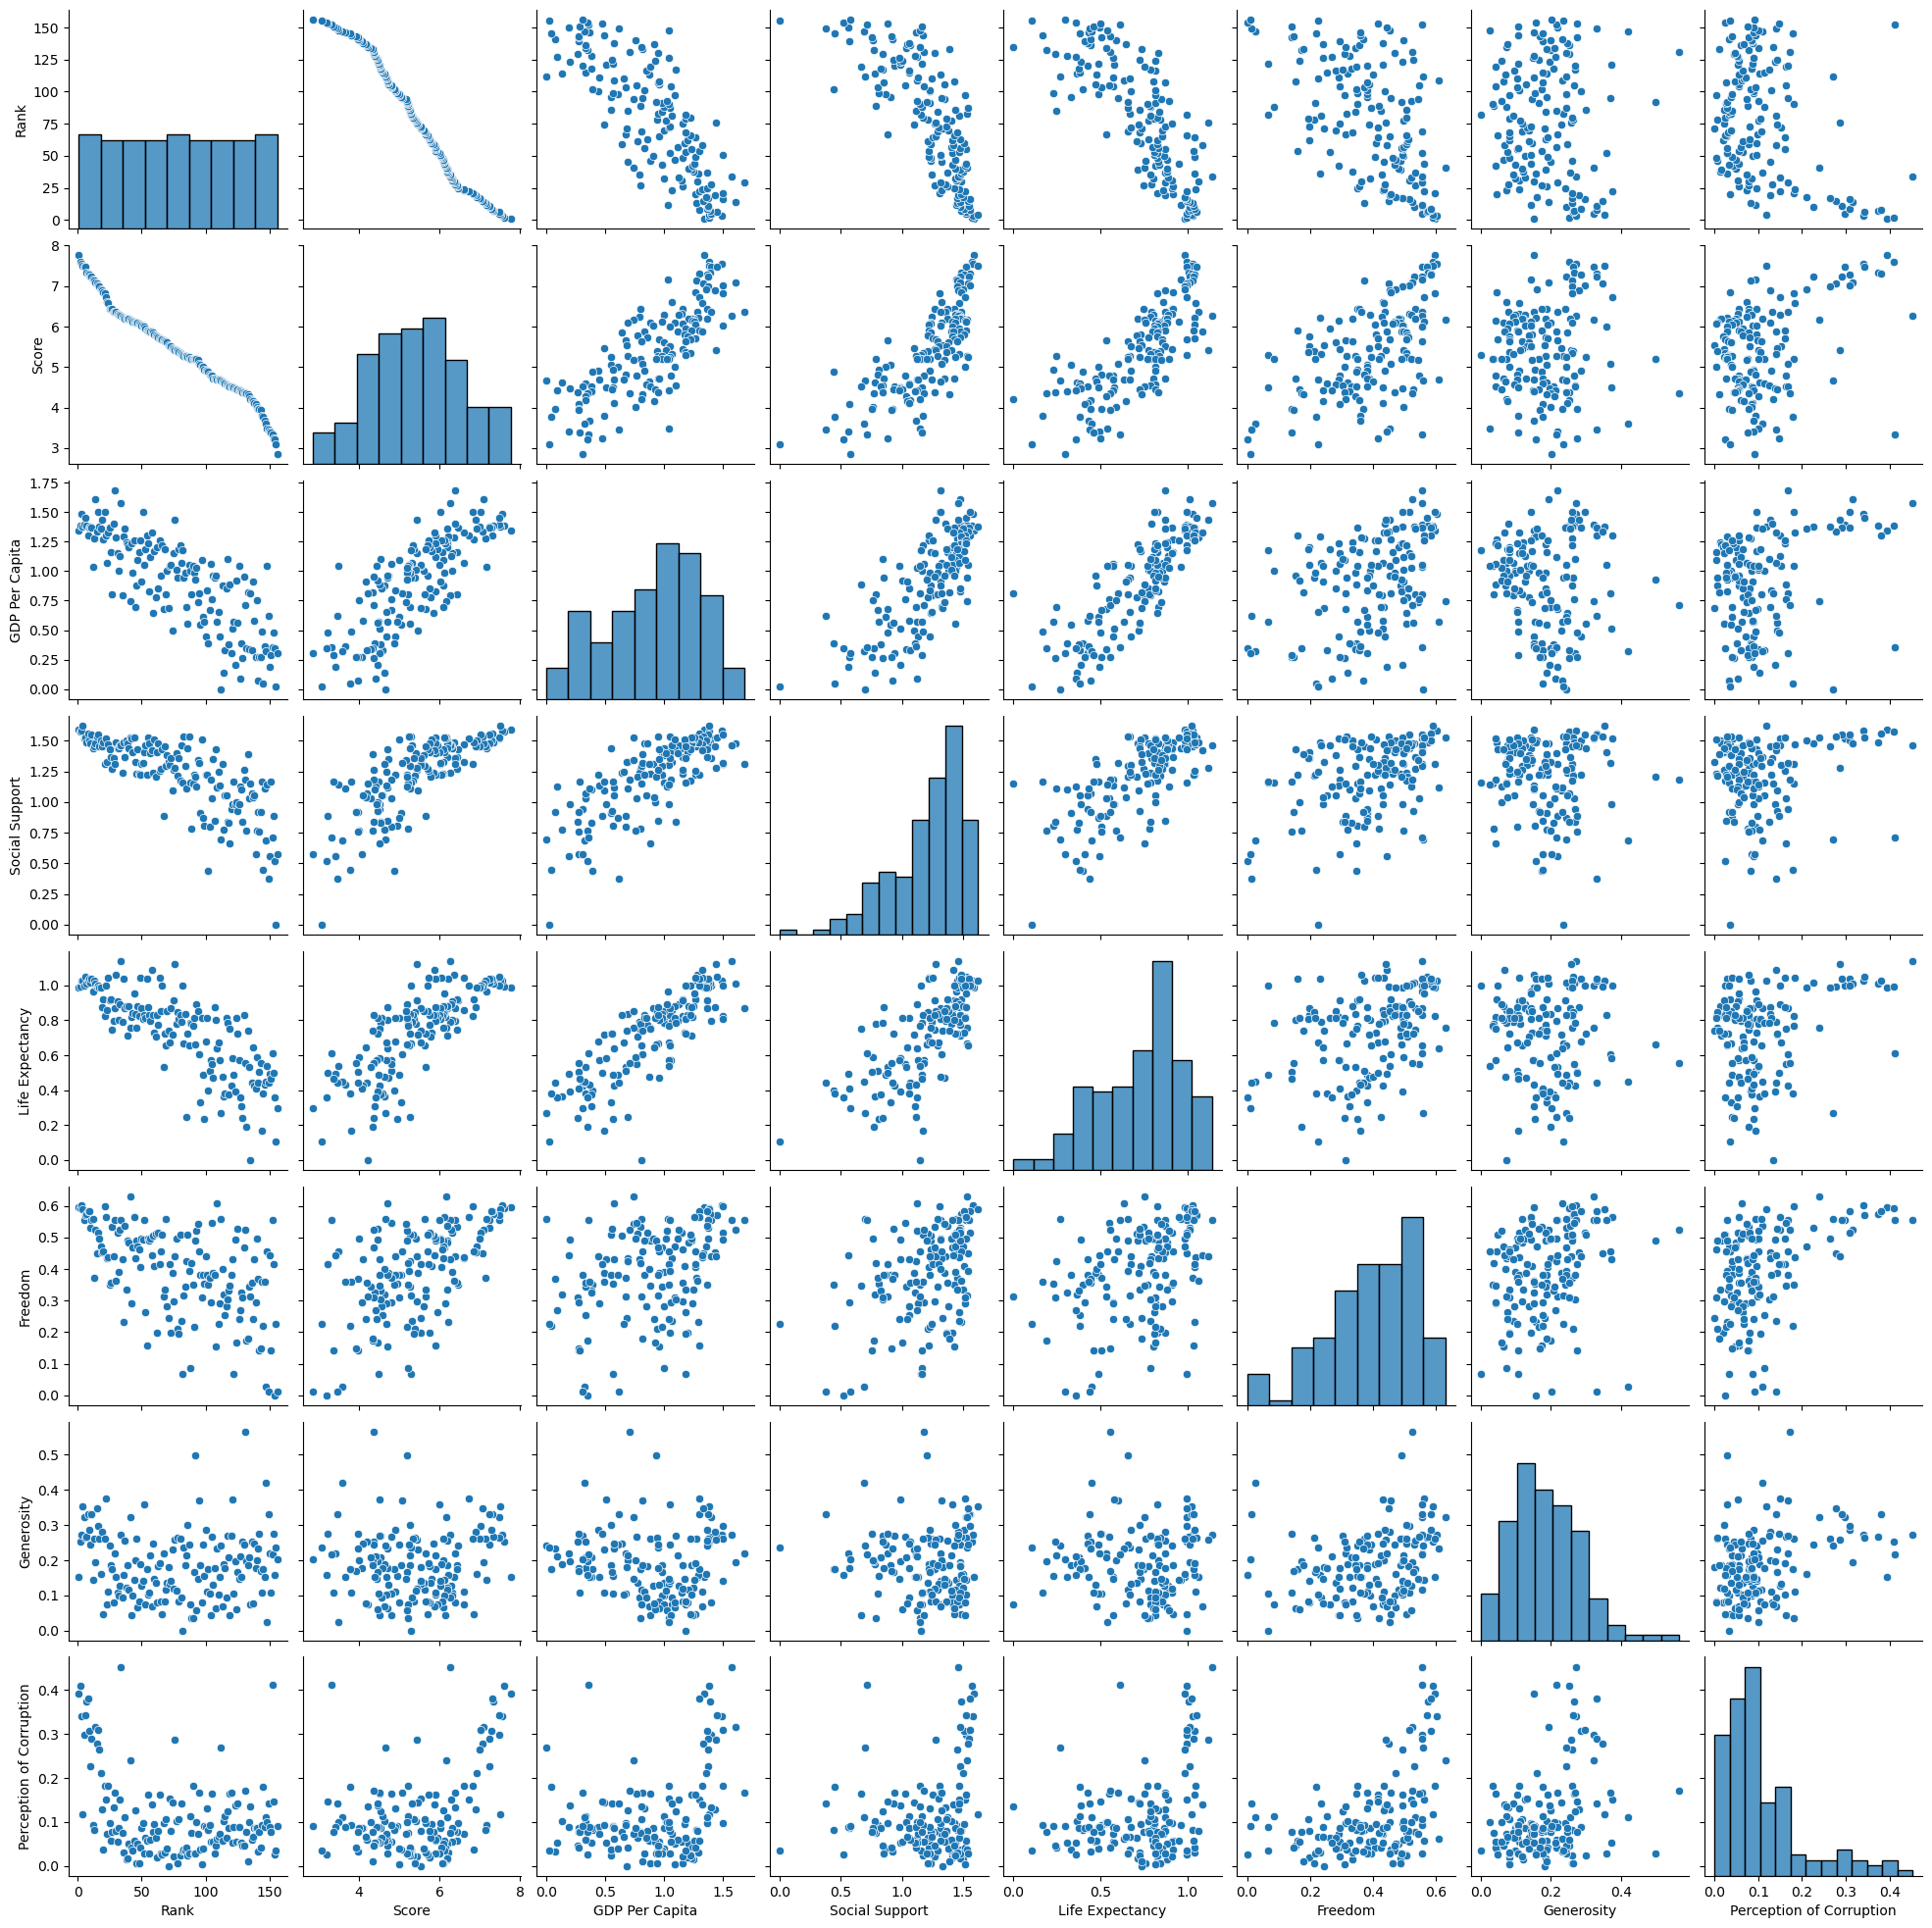

In [29]:
# Create Pair Plot
pair_plot = sns.pairplot(happiness_subset)

Q5 Discussion: The same variables appear to have positive slopes with the score and with each other -- GDP per capita, social support, and life expectancy. Many of the other pairs do not have obvious trend lines. Based on the results, I would like to look more at the same variables with stronger correlations -- GDP per capita, social support, and life expectancy.

7. Create Categorical Plot

/Users/seema/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/seema/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Score', ylabel='Count'>

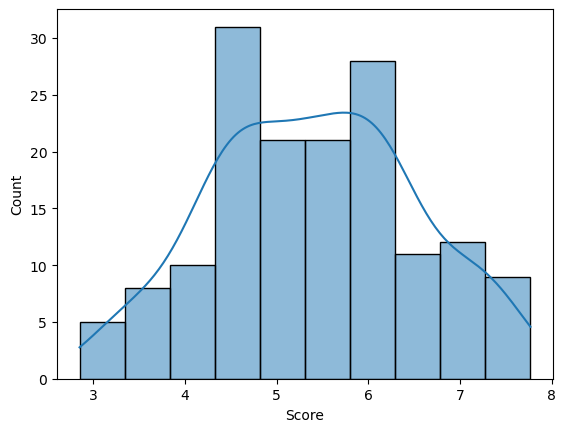

In [30]:
# Create Histogram to Determine Bins
sns.histplot(happiness_subset['Score'], bins = 10, kde = True)

In [31]:
# Create Score Categories
happiness_subset.loc[happiness_subset['Score'] < 4.5 , 'Score Category'] = 'Low Score'
happiness_subset.loc[(happiness_subset['Score'] >= 4.5) & (happiness_subset['Score'] <= 6.5), 'Score Category'] = 'Average Score'
happiness_subset.loc[happiness_subset['Score'] > 6.5 , 'Score Category'] = 'High Score'

/var/folders/n3/lnt6wvj12kzbvn40w88d_tf40000gn/T/ipykernel_74776/2972241532.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Low Score' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  happiness_subset.loc[happiness_subset['Score'] < 4.5 , 'Score Category'] = 'Low Score'


In [32]:
happiness_subset['Score Category'].value_counts(dropna = False)

Score Category
Average Score    97
Low Score        35
High Score       24
Name: count, dtype: int64

/Users/seema/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/seema/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/seema/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/seema/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

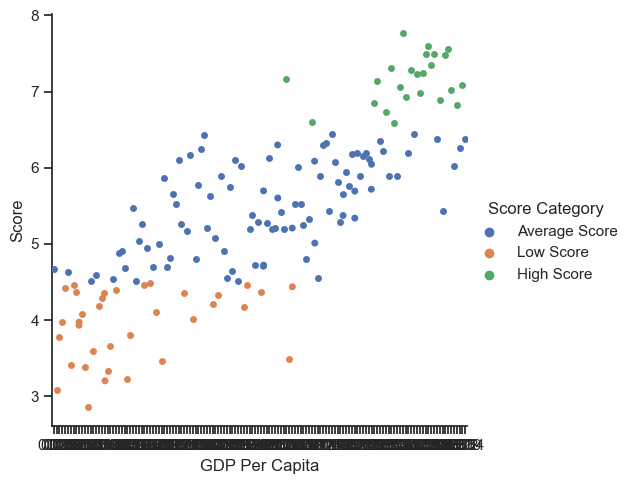

In [33]:
# Create Categorical Plot
sns.set(style="ticks")
cat_plot_GDP = sns.catplot(x='GDP Per Capita', y='Score', hue="Score Category", data=happiness_subset)

Q6 Discussion: The categorical plot shows that for the average happiness scores, a full range of GDP per capita is possible. But for a lower happiness score, the GDP per capita is never very high and it is never very low for a high happiness score. The results are the most striking for the high and low happiness scores.

Q7 Questions from 6.1:

1. Which variable most impacts happiness?

GDP per capita seems most relevant to happiness, and then social support and life expectancy are also very important.

2. Is a combination of factors required to achieve greater happiness?

It does seem likely that there are multiple factors that need to be true for nations to be happy. It is probably necessary to have some minimum level of multiple factors for people to be able to be happy.

3. Do some variables seem to have no impact on happiness?

It looks like generosity has very little impact on a country's happiness level.

New Questions:

1. Are there certain variables that are highly correlated with each other?

It appears from the pair plot that there are several variables correlated with each other. A high GDP likely facilitates other factors, such as life expectancy.

Q8 Initial Hypothesis: 

There are minimum values for GDP per capita, social support, and life expectancy that are required for a country to have a high level of happiness.